## Credit Card Fraud Detection using CNN

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [122]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam


In [123]:
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [124]:
df.shape

(284807, 31)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [126]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [127]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

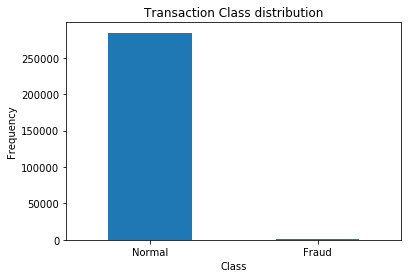

In [128]:
RANDOM_SEED = 100
LABELS = ["Normal", "Fraud"]

no_of_classes = pd.value_counts(df['Class'], sort = True)
no_of_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

### Balancing the Dataset 

In [129]:
Normal = df[df['Class']==0]
Fraud = df[df['Class']==1]

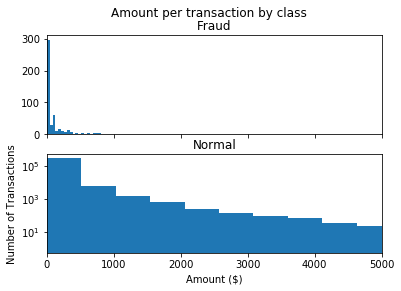

In [130]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 5000))
plt.yscale('log')
plt.show();

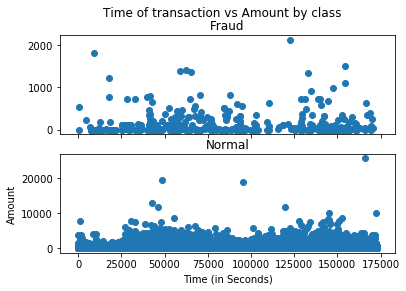

In [131]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [132]:
Normal.shape, Fraud.shape

((284315, 31), (492, 31))

In [133]:
Normal = Normal.sample(Fraud.shape[0])
Normal.shape

(492, 31)

In [134]:
df = Fraud.append(Normal, ignore_index=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,79381.0,1.226566,-0.454822,0.780523,-0.911840,-1.049894,-0.327866,-0.726383,0.171583,1.682029,...,0.010359,0.213434,-0.080911,0.009532,0.492003,-0.681527,0.085176,0.020403,1.00,0
980,59419.0,-7.834439,5.074372,-2.355542,-2.288419,-2.328402,-0.825089,-1.108412,2.133245,3.214378,...,-0.669808,-0.236393,0.403484,0.005927,0.550385,0.618491,0.011674,-1.138644,0.77,0
981,57337.0,-2.030414,-0.602036,-0.652583,-0.449921,1.190427,3.744193,-1.424586,1.860615,-1.385125,...,-0.082271,-0.214031,-0.257554,1.013374,0.023698,-0.180167,0.145170,-0.125490,99.00,0
982,140608.0,1.284440,-1.469589,-0.755021,0.622326,-1.050745,-0.611101,0.004869,-0.141512,1.363232,...,0.088493,-0.463800,0.038800,-0.141837,-0.529681,-0.962357,-0.011821,0.034401,368.92,0


In [135]:
df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

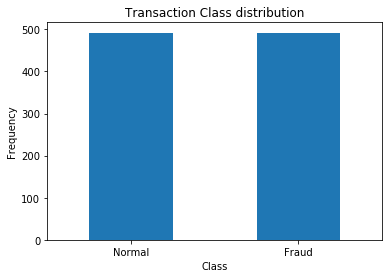

In [136]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [137]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [139]:
X_train.shape, X_test.shape

((688, 30), (296, 30))

In [140]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [141]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [142]:
X_train.shape

(688, 30)

In [143]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [145]:
X_train.shape, X_test.shape

((688, 30, 1), (296, 30, 1))

### Building CNN based model

In [146]:
epochs = 20
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [147]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 29, 64)            192       
_________________________________________________________________
batch_normalization_12 (Batc (None, 29, 64)            256       
_________________________________________________________________
dropout_18 (Dropout)         (None, 29, 64)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 28, 64)            8256      
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 64)            256       
_________________________________________________________________
dropout_19 (Dropout)         (None, 28, 64)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1792)             

In [148]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [149]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Train on 688 samples, validate on 296 samples
Epoch 1/20
688/688 [==============================] - 1s 2ms/sample - loss: 0.9034 - accuracy: 0.6032 - val_loss: 0.6257 - val_accuracy: 0.8378
Epoch 2/20
688/688 [==============================] - 0s 270us/sample - loss: 0.4694 - accuracy: 0.7878 - val_loss: 0.5884 - val_accuracy: 0.7905
Epoch 3/20
688/688 [==============================] - 0s 256us/sample - loss: 0.3504 - accuracy: 0.8794 - val_loss: 0.5615 - val_accuracy: 0.8345
Epoch 4/20
688/688 [==============================] - 0s 255us/sample - loss: 0.3185 - accuracy: 0.8823 - val_loss: 0.5390 - val_accuracy: 0.9054
Epoch 5/20
688/688 [==============================] - 0s 262us/sample - loss: 0.3184 - accuracy: 0.8924 - val_loss: 0.5182 - val_accuracy: 0.9020
Epoch 6/20
688/688 [==============================] - 0s 257us/sample - loss: 0.2819 - accuracy: 0.8939 - val_loss: 0.4864 - val_accuracy: 0.9020
Epoch 7/20
688/688 [==============================] - 0s 231us/sample - loss: 0.

In [150]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

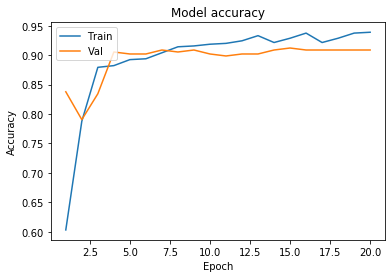

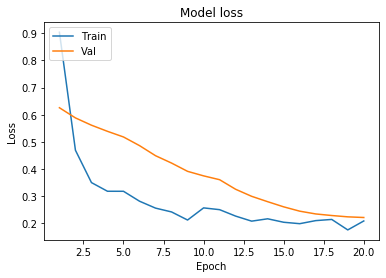

In [151]:
plot_learningCurve(history, epochs)

### Adding MaxPool Layer

Train on 688 samples, validate on 296 samples
Epoch 1/100
688/688 [==============================] - 1s 2ms/sample - loss: 1.2857 - accuracy: 0.5334 - val_loss: 0.6793 - val_accuracy: 0.6791
Epoch 2/100
688/688 [==============================] - 0s 245us/sample - loss: 1.0539 - accuracy: 0.5959 - val_loss: 0.6591 - val_accuracy: 0.6486
Epoch 3/100
688/688 [==============================] - 0s 211us/sample - loss: 0.8391 - accuracy: 0.6526 - val_loss: 0.6442 - val_accuracy: 0.6115
Epoch 4/100
688/688 [==============================] - 0s 212us/sample - loss: 0.6778 - accuracy: 0.7078 - val_loss: 0.6347 - val_accuracy: 0.5980
Epoch 5/100
688/688 [==============================] - 0s 214us/sample - loss: 0.6966 - accuracy: 0.7020 - val_loss: 0.6293 - val_accuracy: 0.5912
Epoch 6/100
688/688 [==============================] - 0s 214us/sample - loss: 0.6417 - accuracy: 0.7384 - val_loss: 0.6223 - val_accuracy: 0.5980
Epoch 7/100
688/688 [==============================] - 0s 213us/sample - l

688/688 [==============================] - 0s 232us/sample - loss: 0.2465 - accuracy: 0.9157 - val_loss: 0.2539 - val_accuracy: 0.9020
Epoch 57/100
688/688 [==============================] - 0s 232us/sample - loss: 0.2292 - accuracy: 0.9244 - val_loss: 0.2543 - val_accuracy: 0.9020
Epoch 58/100
688/688 [==============================] - 0s 222us/sample - loss: 0.2559 - accuracy: 0.9128 - val_loss: 0.2520 - val_accuracy: 0.9020
Epoch 59/100
688/688 [==============================] - 0s 230us/sample - loss: 0.2097 - accuracy: 0.9273 - val_loss: 0.2503 - val_accuracy: 0.8986
Epoch 60/100
688/688 [==============================] - 0s 229us/sample - loss: 0.2179 - accuracy: 0.9230 - val_loss: 0.2499 - val_accuracy: 0.8986
Epoch 61/100
688/688 [==============================] - 0s 232us/sample - loss: 0.2445 - accuracy: 0.9201 - val_loss: 0.2500 - val_accuracy: 0.8986
Epoch 62/100
688/688 [==============================] - 0s 239us/sample - loss: 0.2288 - accuracy: 0.9201 - val_loss: 0.2508 

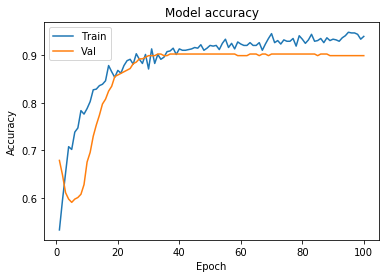

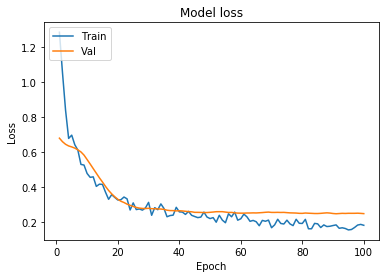

In [152]:
epochs = 100
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

In [153]:
test_scores = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])


296/1 - 0s - loss: 0.1508 - accuracy: 0.8986
Test loss: 0.2472971842901127
Test accuracy: 0.8986486
